In [105]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df = pd.read_csv('2013_movies.csv')

### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [52]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [53]:
df['one'] = 1

In [54]:
features = pd.DataFrame(df.one)
target = df.DomesticTotalGross

In [55]:
lr = LinearRegression()
lr.fit(features, target)
lr.score(features, target)

0.0

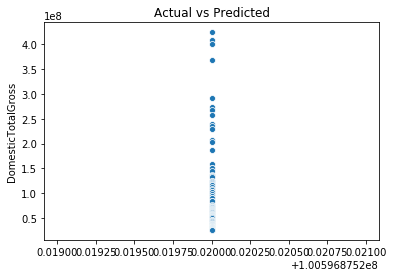

In [56]:
sns.scatterplot(lr.predict(features), target)
plt.title('Actual vs Predicted')

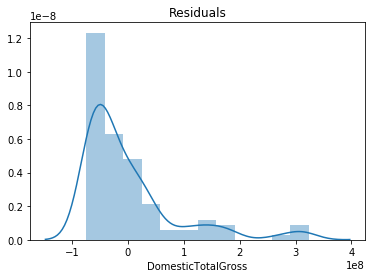

In [57]:
residuals = df.DomesticTotalGross - lr.predict(features)
sns.distplot(residuals)
plt.title('Residuals')

The residuals are right skewed indicating there are unexplained trends in the model

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [58]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,one
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [60]:
lr.fit(df[['one', 'Runtime']], target)
lr.score(df[['one', 'Runtime']], target)

0.085647682369331624

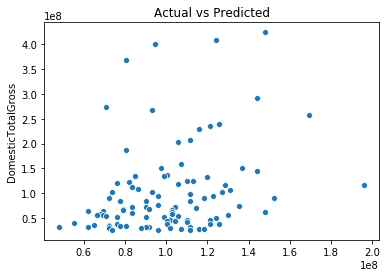

In [61]:
sns.scatterplot(lr.predict(df[['one', 'Runtime']]), target)
plt.title('Actual vs Predicted')

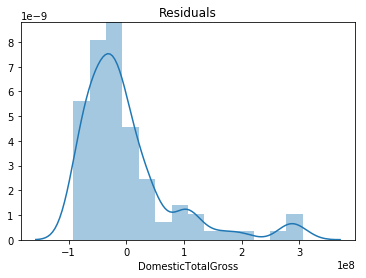

In [62]:
residuals = df.DomesticTotalGross - lr.predict(df[['one', 'Runtime']])
sns.distplot(residuals)
plt.title('Residuals')

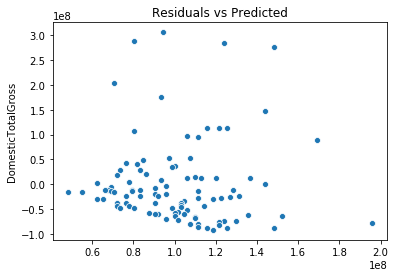

In [64]:
sns.scatterplot(lr.predict(df[['one', 'Runtime']]), residuals)
plt.title('Residuals vs Predicted')

With more information added to the model, the residuals are becoming more normally disctibuted

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [35]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,one
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [66]:
dummy = pd.get_dummies(df.Rating)
df = pd.concat([df, dummy], axis=1)

In [67]:
lr.fit(df[['one', 'Runtime', 'PG', 'PG-13', 'R']], target)
lr.score(df[['one', 'Runtime', 'PG', 'PG-13', 'R']], target)

0.21480483988134236

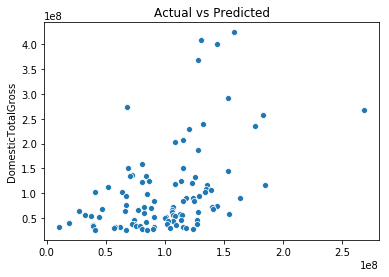

In [68]:
sns.scatterplot(lr.predict(df[['one', 'Runtime', 'PG', 'PG-13', 'R']]), target)
plt.title('Actual vs Predicted')

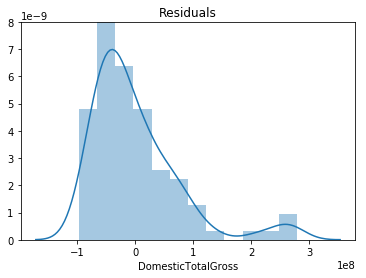

In [48]:
residuals = df.DomesticTotalGross - lr.predict(df[['one', 'Runtime', 'PG', 'PG-13', 'R']])
sns.distplot(residuals)
plt.title('Residuals')

Residuals look similar to before. Actual vs predicted is becoming slightly more linear

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [69]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,one,G,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,0,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,0,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,0,1,0


In [93]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate)
df.dropna(inplace=True)

In [100]:
df['month'] = df.ReleaseDate.dt.month
features = df[['one', 'Runtime', 'PG', 'PG-13', 'R', 'Budget', 'month']]
target = df.DomesticTotalGross
poly = PolynomialFeatures(2)

lr.fit(poly.fit_transform(features), target)
lr.score(poly.fit_transform(features), target)

0.32301827642640379

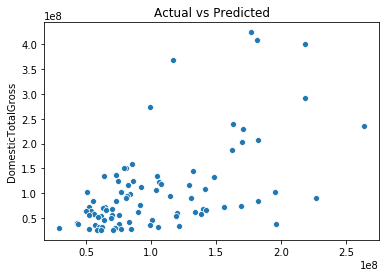

In [101]:
sns.scatterplot(lr.predict(poly.transform(features)), target)
plt.title('Actual vs Predicted')

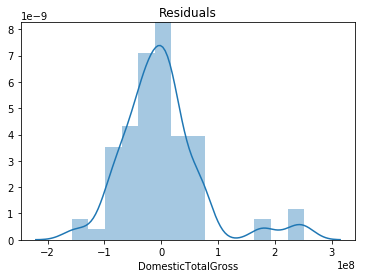

In [103]:
residuals = df.DomesticTotalGross - lr.predict(poly.transform(features))
sns.distplot(residuals)
plt.title('Residuals')

Polynomial features make the residuals for this model almost have a normal distribution

### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [107]:
lr.fit(poly.fit_transform(X_train), y_train)
lr.score(poly.fit_transform(X_test), y_test)

0.35730130028829665

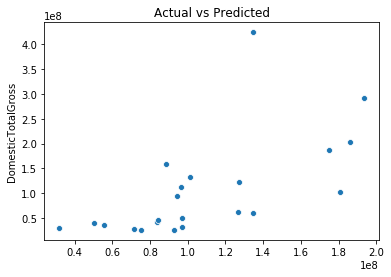

In [108]:
sns.scatterplot(lr.predict(poly.transform(X_test)), y_test)
plt.title('Actual vs Predicted')